In [1]:
#先导入所有要用的包
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols 
from sklearn.linear_model import LinearRegression
#导入文件
rd=pd.read_csv('小红书数据.csv')

In [2]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 8 columns):
revenue                    29452 non-null float64
gender                     17723 non-null float64
age                        17723 non-null float64
engaged_last_30            17723 non-null float64
lifecycle                  29452 non-null object
 days_since_last_order     29452 non-null float64
previous_order_amount      29452 non-null float64
3rd_party_stores           29452 non-null int64
dtypes: float64(6), int64(1), object(1)
memory usage: 1.8+ MB


In [3]:
#在engaged_last_30,age,gender,存在缺失值，可统计缺失值个数
rd.isnull().sum()

revenue                        0
gender                     11729
age                        11729
engaged_last_30            11729
lifecycle                      0
 days_since_last_order         0
previous_order_amount          0
3rd_party_stores               0
dtype: int64

In [4]:
rd.head()

,revenue,gender,age,engaged_last_30,lifecycle,days_since_last_order,previous_order_amount,3rd_party_stores
0,72.98,0.0,43.0,0.0,B,4.26,2343.870,0
1,200.99,0.0,34.0,0.0,A,0.94,8539.872,0
2,69.98,0.0,16.0,0.0,C,4.29,1687.646,1
3,649.99,NaN,NaN,NaN,C,14.90,3498.846,0
4,83.59,NaN,NaN,NaN,C,21.13,3968.490,4


In [5]:
rd.describe()

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores
count,29452.000000,17723.000000,17723.000000,17723.000000,29452.000000,29452.000000,29452.000000
mean,397.071515,0.298200,29.419286,0.073069,7.711348,2339.254020,2.286059
std,959.755615,0.457481,9.213604,0.260257,6.489289,2361.572921,3.538219
min,0.020000,0.000000,14.000000,0.000000,0.130000,0.000000,0.000000
25%,74.970000,0.000000,21.000000,0.000000,2.190000,773.349500,0.000000
50%,175.980000,0.000000,29.000000,0.000000,5.970000,1655.790000,0.000000
75%,498.772500,1.000000,37.000000,0.000000,11.740000,3084.796500,3.000000
max,103466.100000,1.000000,45.000000,1.000000,23.710000,11597.900000,10.000000


In [6]:
#将类别型变量变成哑变量
rd = pd.get_dummies(rd)

In [7]:
rd.head()

,revenue,gender,age,engaged_last_30,days_since_last_order,previous_order_amount,3rd_party_stores,lifecycle_A,lifecycle_B,lifecycle_C
0,72.98,0.0,43.0,0.0,4.26,2343.870,0,0,1,0
1,200.99,0.0,34.0,0.0,0.94,8539.872,0,1,0,0
2,69.98,0.0,16.0,0.0,4.29,1687.646,1,0,0,1
3,649.99,NaN,NaN,NaN,14.90,3498.846,0,0,0,1
4,83.59,NaN,NaN,NaN,21.13,3968.490,4,0,0,1


In [10]:
#对age进行均值填补
rd.age=rd.age.fillna(rd.age.mean())
rd.age.describe()

count    29452.000000
mean        29.419286
std          7.147199
min         14.000000
25%         27.000000
50%         29.419286
75%         32.000000
max         45.000000
Name: age, dtype: float64

In [15]:
#对gender和engaged_last_30处理
rd.gender.unique()

array([0.0, 'unkonwn', 1.0], dtype=object)

In [16]:
rd = rd.fillna('unkonwn')
rd = pd.get_dummies(rd)

In [17]:
rd.head(10)

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores,lifecycle_A,lifecycle_B,lifecycle_C,gender_0.0,gender_1.0,gender_unkonwn,engaged_last_30_0.0,engaged_last_30_1.0,engaged_last_30_unkonwn
0,72.98,43.000000,4.26,2343.870,0,0,1,0,1,0,0,1,0,0
1,200.99,34.000000,0.94,8539.872,0,1,0,0,1,0,0,1,0,0
2,69.98,16.000000,4.29,1687.646,1,0,0,1,1,0,0,1,0,0
3,649.99,29.419286,14.90,3498.846,0,0,0,1,0,0,1,0,0,1
4,83.59,29.419286,21.13,3968.490,4,0,0,1,0,0,1,0,0,1
5,319.99,15.000000,15.13,2811.491,10,0,0,1,1,0,0,1,0,0
6,140.00,19.000000,11.45,769.990,4,0,0,1,1,0,0,1,0,0
7,51.98,34.000000,3.71,2542.822,1,0,0,1,1,0,0,1,0,0
8,587.99,29.419286,22.42,602.980,10,0,0,1,0,0,1,0,0,1
9,349.99,29.419286,8.26,298.790,3,0,0,1,0,0,1,0,0,1


In [18]:
#处理后，无缺失值
rd.isnull().sum()

revenue                    0
age                        0
 days_since_last_order     0
previous_order_amount      0
3rd_party_stores           0
lifecycle_A                0
lifecycle_B                0
lifecycle_C                0
gender_0.0                 0
gender_1.0                 0
gender_unkonwn             0
engaged_last_30_0.0        0
engaged_last_30_1.0        0
engaged_last_30_unkonwn    0
dtype: int64

In [19]:
#二.单变量分析
#对数字型变量分析
rd.describe()

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores,lifecycle_A,lifecycle_B,lifecycle_C,gender_0.0,gender_1.0,gender_unkonwn,engaged_last_30_0.0,engaged_last_30_1.0,engaged_last_30_unkonwn
count,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000,29452.000000
mean,397.071515,29.419286,7.711348,2339.254020,2.286059,0.120263,0.193841,0.685896,0.422314,0.179445,0.398241,0.557789,0.043970,0.398241
std,959.755615,7.147199,6.489289,2361.572921,3.538219,0.325275,0.395312,0.464166,0.493936,0.383731,0.489544,0.496658,0.205032,0.489544
min,0.020000,14.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.970000,27.000000,2.190000,773.349500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,175.980000,29.419286,5.970000,1655.790000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,498.772500,32.000000,11.740000,3084.796500,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,103466.100000,45.000000,23.710000,11597.900000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#用户年龄在14-45岁之间，用户的下单金额最大最小差距很大，用户的最近购买天数最大的也在一个月内


#对类别型变量分析
rd.groupby('lifecycle_A').revenue.describe()


,count,mean,std,min,25%,50%,75%,max
lifecycle_A,,,,,,,,
0,25910.0,392.214183,743.069340,0.02,74.98,176.315,499.980,62100.0
1,3542.0,432.603267,1902.556578,0.02,71.93,170.945,479.835,103466.1


In [33]:
rd.groupby('lifecycle_B').revenue.describe()


,count,mean,std,min,25%,50%,75%,max
lifecycle_B,,,,,,,,
0,23743.0,401.243985,1027.305627,0.02,74.98,174.54,499.99,103466.10
1,5709.0,379.718743,602.175686,0.10,72.99,179.98,469.19,21068.17


In [34]:
rd.groupby('lifecycle_C').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
lifecycle_C,,,,,,,,
0,9251.0,399.967038,1268.894256,0.02,71.99,179.00,474.70,103466.1
1,20201.0,395.745516,778.255044,0.02,74.99,174.98,505.98,62100.0


In [36]:
#由上可得，C用户很多，但平均消费不高，不如A用户

#对gender分析
rd.groupby('gender_0.0').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
gender_0.0,,,,,,,,
0,17014.0,412.411493,1127.654190,0.02,75.96,179.97,518.7575,103466.1
1,12438.0,376.087884,664.092156,0.02,71.98,165.97,470.9750,29080.8


In [37]:
rd.groupby('gender_1.0').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
gender_1.0,,,,,,,,
0,24167.0,397.014584,1019.537326,0.02,73.96,173.98,497.99,103466.1
1,5285.0,397.331844,616.564433,0.83,75.96,180.98,499.99,16500.0


In [40]:
rd.groupby('gender_unkonwn').revenue.describe()

,count,mean,std,min,25%,50%,75%,max
gender_unkonwn,,,,,,,,
0,17723.0,382.422835,650.33831,0.02,72.98,169.99,479.99,29080.8
1,11729.0,419.206270,1293.52377,0.02,75.96,179.00,528.99,103466.1


In [41]:
#由上可得 女性用户多余男性用户大约两倍，还存在大量未知用户，但是男性用户消费多于女性用户


#三，相关与可视化

rd.corr()

,revenue,age,days_since_last_order,previous_order_amount,3rd_party_stores,lifecycle_A,lifecycle_B,lifecycle_C,gender_0.0,gender_1.0,gender_unkonwn,engaged_last_30_0.0,engaged_last_30_1.0,engaged_last_30_unkonwn
revenue,1.000000,3.292285e-03,0.036754,0.168186,-0.026102,0.013688,-0.008866,-0.002042,-0.018694,0.000127,1.876218e-02,-0.034242,0.038149,1.876218e-02
age,0.003292,1.000000e+00,0.010905,-0.002500,-0.002196,-0.007855,0.006140,0.000275,-0.008465,0.010896,-4.973248e-16,0.005069,-0.012280,-4.973248e-16
days_since_last_order,0.036754,1.090490e-02,1.000000,-0.084661,0.351752,-0.412023,-0.391865,0.622470,-0.065627,-0.035832,9.430284e-02,-0.084361,-0.020811,9.430284e-02
previous_order_amount,0.168186,-2.500290e-03,-0.084661,1.000000,-0.213778,0.094548,0.091051,-0.143801,0.034755,0.081902,-9.926644e-02,0.036408,0.148820,-9.926644e-02
3rd_party_stores,-0.026102,-2.196181e-03,0.351752,-0.213778,1.000000,-0.238891,-0.316827,0.437238,-0.068195,-0.050363,1.082836e-01,-0.089856,-0.040882,1.082836e-01
lifecycle_A,0.013688,-7.854502e-03,-0.412023,0.094548,-0.238891,1.000000,-0.181302,-0.546365,0.018210,0.005824,-2.293772e-02,0.015829,0.016424,-2.293772e-02
lifecycle_B,-0.008866,6.139560e-03,-0.391865,0.091051,-0.316827,-0.181302,1.000000,-0.724610,0.034433,0.030789,-5.887580e-02,0.044028,0.033923,-5.887580e-02
lifecycle_C,-0.002042,2.753940e-04,0.622470,-0.143801,0.437238,-0.546365,-0.724610,1.000000,-0.042086,-0.030303,6.621638e-02,-0.048590,-0.040400,6.621638e-02
gender_0.0,-0.018694,-8.464724e-03,-0.065627,0.034755,-0.068195,0.018210,0.034433,-0.042086,1.000000,-0.399837,-6.955589e-01,0.646827,0.093913,-6.955589e-01
gender_1.0,0.000127,1.089576e-02,-0.035832,0.081902,-0.050363,0.005824,0.030789,-0.030303,-0.399837,1.000000,-3.804285e-01,0.333001,0.101687,-3.804285e-01


In [42]:
#查看revenue与其他变量的相关性
rd.corr()[['revenue']].sort_values('revenue',ascending=False)

,revenue
revenue,1.000000
previous_order_amount,0.168186
engaged_last_30_1.0,0.038149
days_since_last_order,0.036754
gender_unkonwn,0.018762
engaged_last_30_unkonwn,0.018762
lifecycle_A,0.013688
age,0.003292
gender_1.0,0.000127
lifecycle_C,-0.002042


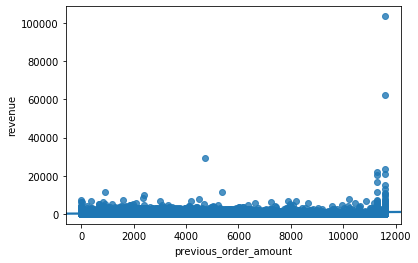

In [43]:
#可以看出revenue只和previous_order_amount相关性大些
#查看可视化图表
sns.regplot('previous_order_amount','revenue',rd)

In [44]:
#四，线性回归模型建立
#设置线性回归模型
model = LinearRegression()

In [45]:
#设置x，y
y = rd['revenue']
x = rd[['previous_order_amount']]

In [46]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
#查看自变量系数
model.coef_
# 查看截距
model.intercept_

print(model.coef_)
print(model.intercept_)

[0.06835166]
237.1796227092193


In [48]:
#评估模型
#打分
score = model.score(x,y)

In [49]:
#计算y预测值
predictions = model.predict(x)

In [50]:
#计算误差
error = predictions-y

In [51]:
rmse = (error**2).mean()**.5
mae = abs(error).mean()
print(rmse)
print(mae)

946.0681075269005
356.3868842528138


In [52]:
#标准模型输出表
model_ols = ols('y~x',rd).fit()

In [53]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     857.3
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          8.74e-186
Time:                        19:42:05   Log-Likelihood:            -2.4360e+05
No. Observations:               29452   AIC:                         4.872e+05
Df Residuals:                   29450   BIC:                         4.872e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    237.1796      7.760     30.565      0.0

In [55]:
#得到模型revenue=237.1796+0.0684*previous_order_amount
#解读：previous_order_amount增加10000个单位，revenue增加684个单位


#模型优化，增加一些变量

y=rd['revenue']
x=rd[['previous_order_amount',' days_since_last_order ','engaged_last_30_1.0']]

model_ols=ols('y~x',rd).fit()
#观察coef系数，怕值显著性
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     315.0
Date:                Sun, 27 Dec 2020   Prob (F-statistic):          2.51e-201
Time:                        19:53:26   Log-Likelihood:            -2.4356e+05
No. Observations:               29452   AIC:                         4.871e+05
Df Residuals:                   29448   BIC:                         4.872e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    173.4378     10.471     16.564      0.0

In [56]:
#拟合度上升了一点点
#线性回归模型可优化

y=rd['revenue']
x=rd[['previous_order_amount',' days_since_last_order ','engaged_last_30_1.0']]
model.fit(x,y)
#查看自变量系数
model.coef_
# 查看截距
model.intercept_

print(model.coef_)
print(model.intercept_)

[ 0.06928517  7.61315861 64.8254868 ]
173.43780859922265


In [57]:
#评估模型
#打分
score = model.score(x,y)
#计算y预测值
predictions = model.predict(x)
#计算误差
error = predictions-y
rmse = (error**2).mean()**.5
mae = abs(error).mean()
print(rmse)
print(mae)

944.7008684220365
352.47317305636676


In [58]:
#误差均减小


#总结
# 一.
# 1.用户年龄在14-45岁之间，用户的下单金额最大最小差距很大，用户的最近购买天数最大的也在一个月内
# 2.C用户很多，但平均消费不高，不如A用户
# 3.女性用户多余男性用户大约两倍，还存在大量未知用户，但是男性用户消费多于女性用户
# 二.线性回归模型
# revenue = 173.4378+0.0693*previous_order_amount+7.6132*days_since_last_order+64.8255*engaged_last_30_1.0）
# 三.高价值用户
# 以往购买金额越多，距离最后一次下单更久，男性用户

